In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt


In [23]:
torch.manual_seed(42)

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device:", device)

Using Device: cuda


In [25]:
df = pd.read_csv("E:\\Notes\\Python'\\PyTorch\\Datasets\\Fashion-mnist\\fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32).reshape(-1, 1, 28, 28)   # Reshape as the CNN input 
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [29]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [30]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

##### **Model Architecture-**

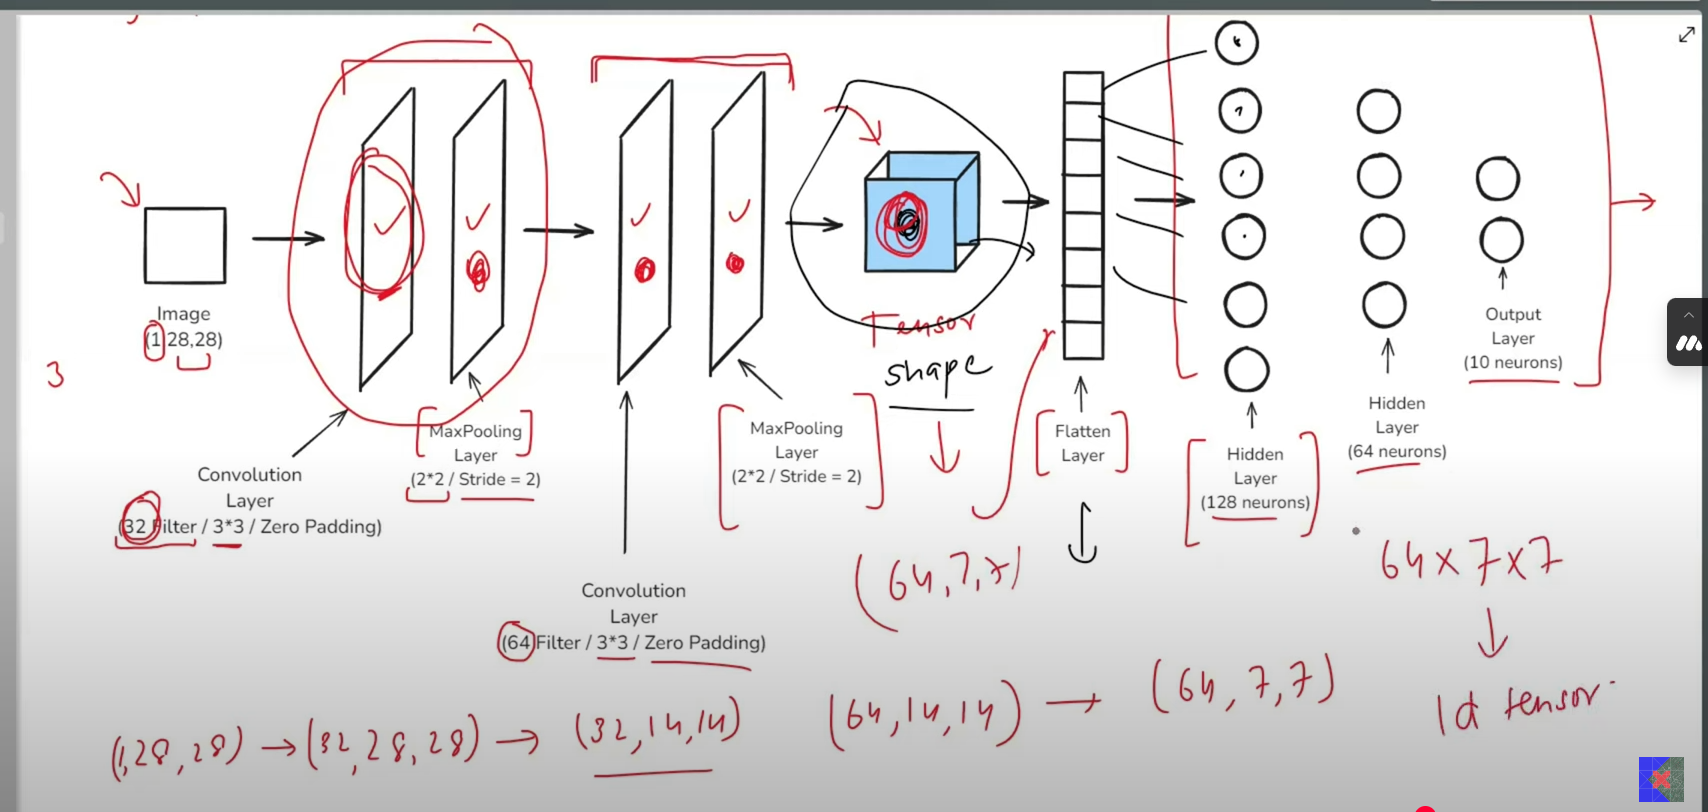

In [31]:
class MyNN(nn.Module):

    def __init__(self, input_features):
        super().__init__()

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(input_features, 32, kernel_size=3, padding='same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128), # Adjusted for the output size after conv layers
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.feature_extraction(x)
        x = self.classifier(x)
        return x

In [ ]:
learning_rate = 0.01
epochs = 100

model = MyNN(1).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Used Adam, got an Accuracy of 0.8375
# With SGD, got an Accuracy of 0.9215

In [33]:
# Training loop

for epoch in range(epochs):
    model.train()
    total_loss=0

    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss /len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 0.7761
Epoch: 2, Loss: 0.4688
Epoch: 3, Loss: 0.3975
Epoch: 4, Loss: 0.3574
Epoch: 5, Loss: 0.3320
Epoch: 6, Loss: 0.3089
Epoch: 7, Loss: 0.2943
Epoch: 8, Loss: 0.2788
Epoch: 9, Loss: 0.2705
Epoch: 10, Loss: 0.2562
Epoch: 11, Loss: 0.2464
Epoch: 12, Loss: 0.2380
Epoch: 13, Loss: 0.2312
Epoch: 14, Loss: 0.2161
Epoch: 15, Loss: 0.2116
Epoch: 16, Loss: 0.2053
Epoch: 17, Loss: 0.2001
Epoch: 18, Loss: 0.1952
Epoch: 19, Loss: 0.1823
Epoch: 20, Loss: 0.1822
Epoch: 21, Loss: 0.1754
Epoch: 22, Loss: 0.1703
Epoch: 23, Loss: 0.1678
Epoch: 24, Loss: 0.1559
Epoch: 25, Loss: 0.1545
Epoch: 26, Loss: 0.1500
Epoch: 27, Loss: 0.1459
Epoch: 28, Loss: 0.1428
Epoch: 29, Loss: 0.1403
Epoch: 30, Loss: 0.1337
Epoch: 31, Loss: 0.1307
Epoch: 32, Loss: 0.1274
Epoch: 33, Loss: 0.1240
Epoch: 34, Loss: 0.1190
Epoch: 35, Loss: 0.1142
Epoch: 36, Loss: 0.1115
Epoch: 37, Loss: 0.1103
Epoch: 38, Loss: 0.1071
Epoch: 39, Loss: 0.1017
Epoch: 40, Loss: 0.0997
Epoch: 41, Loss: 0.0970
Epoch: 42, Loss: 0.0951
E

In [34]:
model.eval()

MyNN(
  (feature_extraction): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [35]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.92175


In [36]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.99925
